# boston House Price

## EDA
[step 1]데이터 준비

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston

# boston 데이타셋 로드
boston = load_boston()

# boston 데이타셋 DataFrame 변환 
bostonDF = pd.DataFrame(boston.data , columns = boston.feature_names)

# boston dataset의 target array는 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가함. 
bostonDF['PRICE'] = boston.target
print('Boston 데이타셋 크기 :',bostonDF.shape)
bostonDF.head()

Boston 데이타셋 크기 : (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


- b: 1000(Bk-0.63)^2, 여기서 Bk는 자치시별 흑인의 비율을 말함.

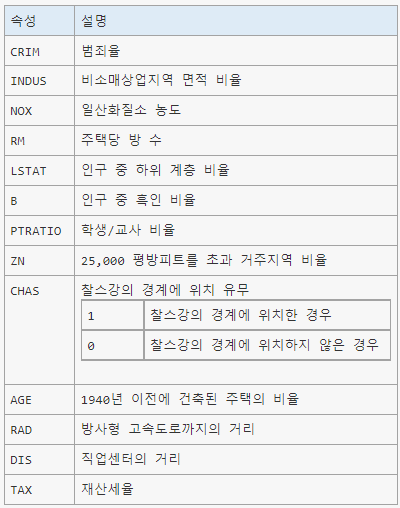

[Step 2] 데이터 탐색

In [2]:
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [3]:
# 데이터 통계 요약정보 확인
bostonDF.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


[Step 3] 속성(feature 또는 variable) 선택

In [4]:
bostonDF = bostonDF[['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD','PRICE']]
bostonDF.head()

,RM,ZN,INDUS,NOX,AGE,PTRATIO,LSTAT,RAD,PRICE
0,6.575,18.0,2.31,0.538,65.2,15.3,4.98,1.0,24.0
1,6.421,0.0,7.07,0.469,78.9,17.8,9.14,2.0,21.6
2,7.185,0.0,7.07,0.469,61.1,17.8,4.03,2.0,34.7
3,6.998,0.0,2.18,0.458,45.8,18.7,2.94,3.0,33.4
4,7.147,0.0,2.18,0.458,54.2,18.7,5.33,3.0,36.2


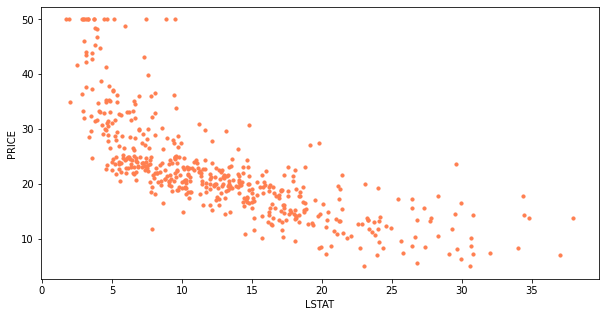

In [5]:
bostonDF.plot(kind='scatter', x='LSTAT', y='PRICE',  
         c='coral', s=10, figsize=(10, 5))
plt.show()

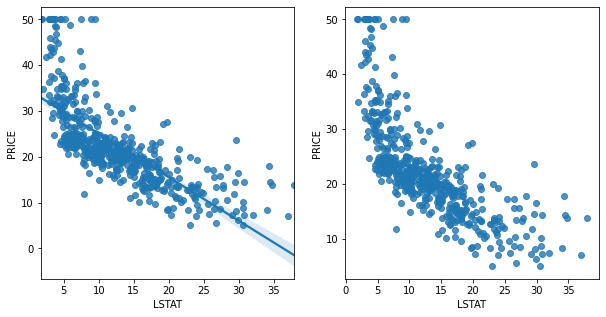

In [6]:
# seaborn으로 산점도 그리기
fig = plt.figure(figsize=(10, 5))   
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
sns.regplot(x='LSTAT', y='PRICE', data=bostonDF, ax=ax1)# 회귀선 표시
sns.regplot(x='LSTAT', y='PRICE', data=bostonDF, ax=ax2, 
            fit_reg=False)  #회귀선 미표시
plt.show()

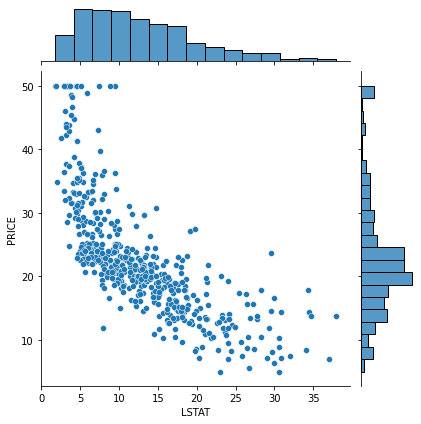

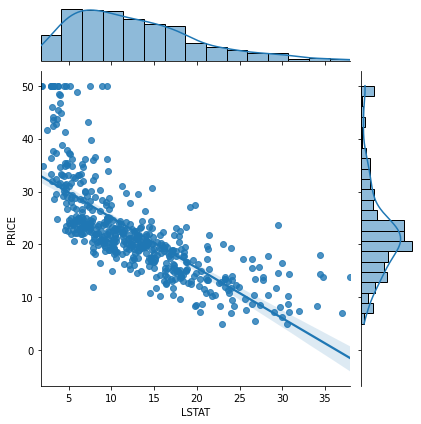

In [7]:
# seaborn 조인트 그래프 - 산점도, 히스토그램
sns.jointplot(x='LSTAT', y='PRICE', data=bostonDF)              # 회귀선 없음
sns.jointplot(x='LSTAT', y='PRICE', data=bostonDF, kind='reg')  # 회귀선 표시
plt.show()

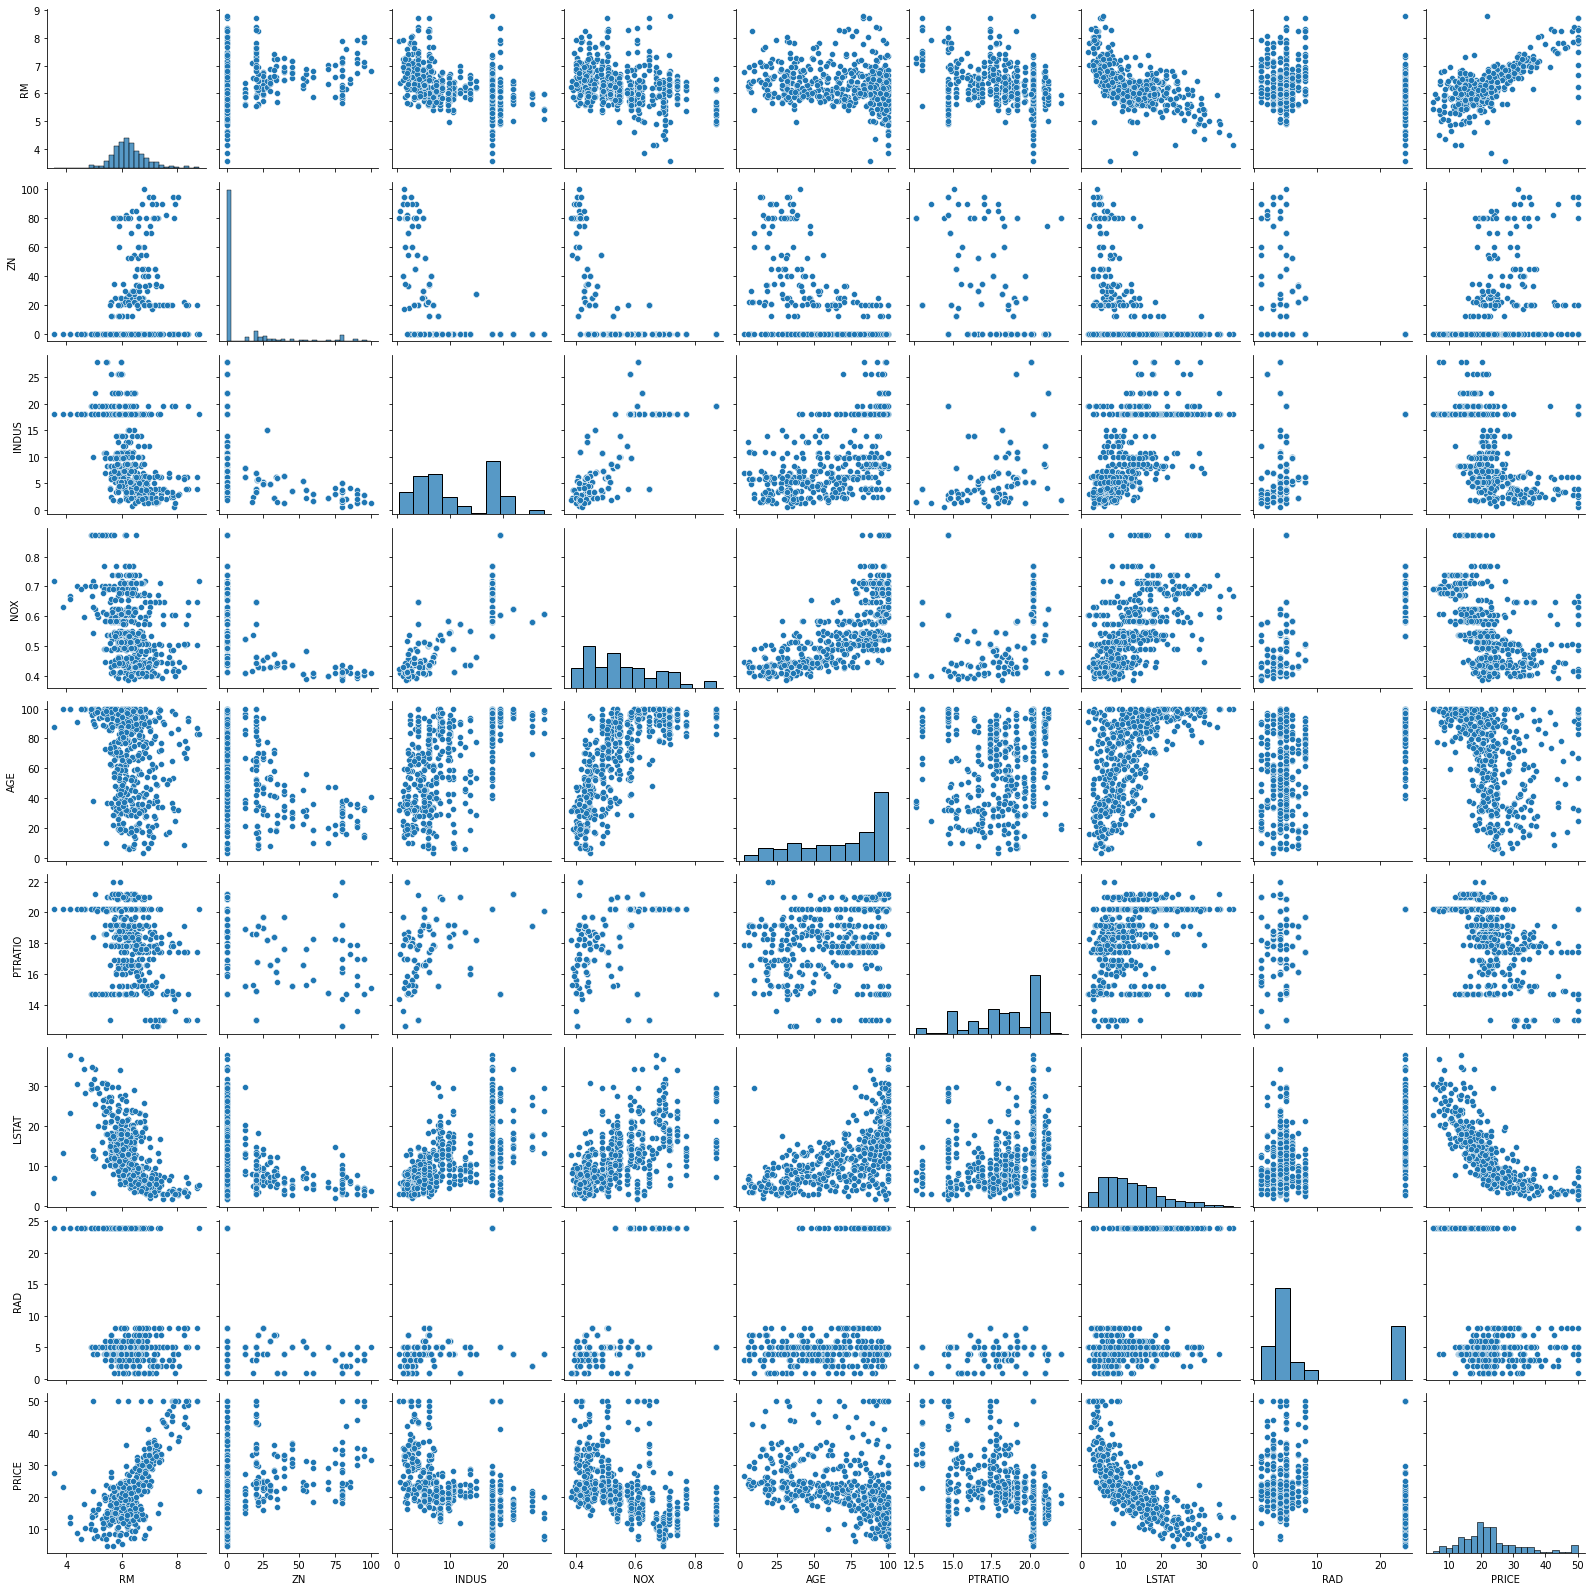

In [8]:
# seaborn pariplot으로 두 변수 간의 모든 경우의 수 그리기
sns.pairplot(bostonDF)  
plt.show()

# 해보기
   

1. 단순 회귀 분석을 수행하세요.   
  - 특성은 원하는 것 하나 선택 하세요.   
   

2. 다항회귀 분석을 수행하세요 (degree=2)   
  - 특성은 위에서 선택한 특성 사용    
   
   
3. 다중회귀 분석을 수행하세요.
  - 특성은 ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']를 사용하세요.


### 단순회귀분석
[Step 4] 데이터셋 구분 - 훈련용(train data)/ 검증용(test data)

In [ ]:
# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split

In [ ]:
# 속성(변수) 선택
X=bostonDF[['LSTAT']]  #독립 변수 X
y=bostonDF['PRICE']       #종속 변수 Y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,               #독립 변수 
                                                    y,               #종속 변수
                                                    test_size=0.3,   #검증 30%
                                                    random_state=10) #랜덤 추출 값 
print('train data 개수: ', len(X_train))
print('test data 개수: ', len(X_test))

train data 개수:  354
test data 개수:  152


In [ ]:
# sklearn 라이브러리에서 선형회귀분석 모듈 가져오기
from sklearn.linear_model import LinearRegression

# 단순회귀분석 모형 객체 생성
lr = LinearRegression()

# train data를 가지고 모형 학습
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
r_square = lr.score(X_test, y_test)
r_square

0.5135208483530074

In [ ]:
# 회귀식의 기울기(W)
print('기울기 a: ', lr.coef_)

기울기 a:  [-0.93128018]


In [ ]:
# 회귀식의 y절편
print('y절편 b', lr.intercept_)

y절편 b 34.0487854799976


In [ ]:
# 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교 
y_hat = lr.predict(X_test)
y_hat

array([25.73245346, 29.36444617, 29.69970703, 28.56354521, 21.68138468,
       18.94342094, 32.43767077, 16.96910696, 21.33681101, 31.13387851,
       20.92704773, 24.80117328, 25.24818777, 31.27357054, 30.17465993,
       28.54491961, 29.31788216, 21.02948855, 24.63354285, 19.96782914,
       29.77420945, 17.48131106, 24.31690759, 28.34935077, 31.37601136,
       24.92223971, 16.21477001, 18.93410814, 31.24563214,  2.04068566,
       26.03046312, 28.12584353, 28.12584353, 27.12006093, 16.6524717 ,
       20.91773493,  2.36663372, 30.73342804, 28.47973   , 26.412288  ,
       30.39816717, 26.9710561 , 15.134485  , 29.96977829, 16.54071808,
       27.36219378, 20.83391971, 21.83970231, 30.547172  , 18.86891853,
       23.20868417, 16.00988837, 23.19937137, 30.72411523, 28.01408991,
       25.11780854, 21.37406222, 22.24946559, 22.27740399, 21.53237985,
       22.63129046, 22.8361721 , 30.95693528, 29.28063095, 29.08506212,
       16.85735334, 28.90811888,  5.52367353, 28.75911405, 30.75

In [ ]:
df_y = pd.DataFrame({'y_hat':y_hat, 'y':y_test})
df_y

,y_hat,y
305,25.732453,28.4
193,29.364446,31.1
65,29.699707,23.5
349,28.563545,26.6
151,21.681385,19.6
...,...,...
56,28.675299,24.7
37,25.881458,21.0
66,24.512476,19.4
427,20.526597,10.9


In [ ]:
df_y['차이']=df_y['y_hat']-df_y['y']
df_y

,y_hat,y,차이
305,25.732453,28.4,-2.667547
193,29.364446,31.1,-1.735554
65,29.699707,23.5,6.199707
349,28.563545,26.6,1.963545
151,21.681385,19.6,2.081385
...,...,...,...
56,28.675299,24.7,3.975299
37,25.881458,21.0,4.881458
66,24.512476,19.4,5.112476
427,20.526597,10.9,9.626597


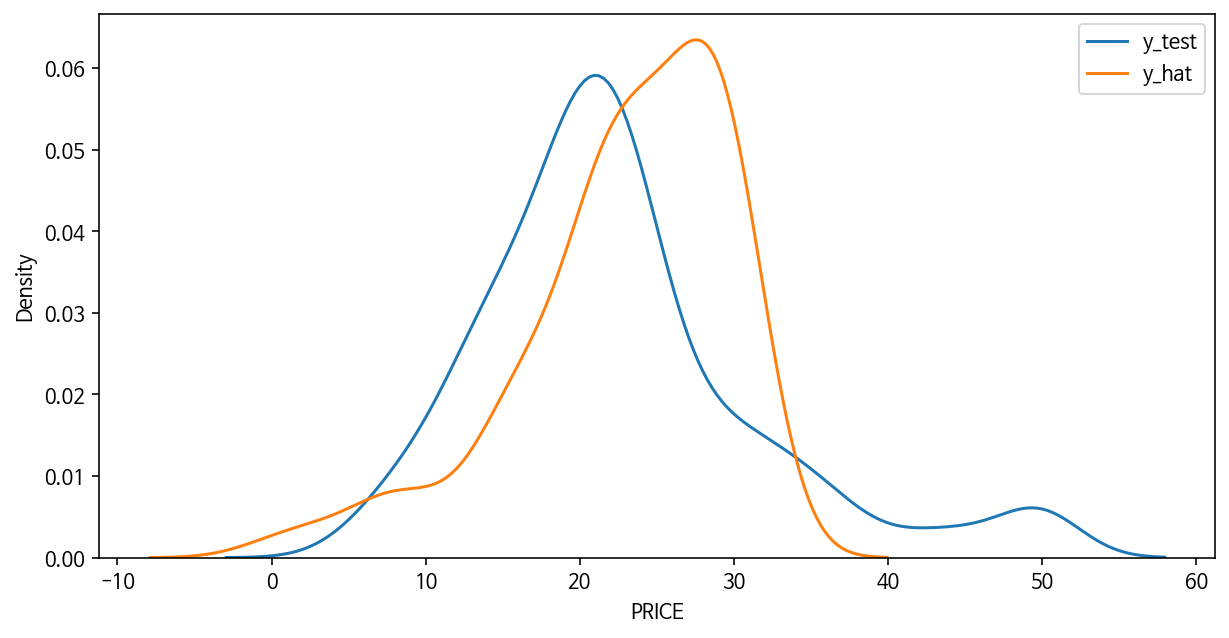

In [ ]:
plt.figure(figsize=(10, 5))
ax1 = sns.kdeplot(y, label="y_test")
ax2 = sns.kdeplot(y_hat, label="y_hat", ax=ax1)
plt.legend()
plt.show()

### 비선형회귀 분석
[Step 4] 데이터셋 구분 - 훈련용(train data)/ 검증용(test data)

In [ ]:
# 속성(변수) 선택
X=bostonDF[['LSTAT']]  #독립 변수 X
y=bostonDF['PRICE']       #종속 변수 Y
X_train, X_test, y_train, y_test = train_test_split(X,               #독립 변수 
                                                    y,               #종속 변수
                                                    test_size=0.3,   #검증 30%
                                                    random_state=10) #랜덤 추출 값 
print('train data 개수: ', len(X_train))
print('test data 개수: ', len(X_test))

train data 개수:  354
test data 개수:  152


In [ ]:
# sklearn 라이브러리에서 필요한 모듈 가져오기 
from sklearn.linear_model import LinearRegression      #선형회귀분석
from sklearn.preprocessing import PolynomialFeatures   #다항식 변환

# 다항식 변환 
poly = PolynomialFeatures(degree=2)               #2차항 적용
X_train_poly=poly.fit_transform(X_train)     #X_train 데이터를 2차항으로 변형
print('원 데이터: ', X_train.shape)
print('2차항 변환 데이터: ', X_train_poly.shape)  

원 데이터:  (354, 1)
2차항 변환 데이터:  (354, 3)


In [ ]:
# train data를 가지고 모형 학습
pr = LinearRegression()   
pr.fit(X_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
X_test_poly=poly.fit_transform(X_test)     #X_train 데이터를 2차항으로 변형

# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
r_square = pr.score(X_test_poly, y_test)
r_square

0.6198253799158913

In [ ]:
# train data의 산점도와 test data로 예측한 회귀선을 그래프로 출력 
y_hat = pr.predict(X_test_poly)
y_hat

array([25.28908934, 31.87929368, 32.55353535, 30.31370053, 19.48094476,
       16.47662716, 38.4768406 , 14.77131048, 19.06198007, 35.56355278,
       18.5790701 , 23.80989852, 24.50918214, 35.86763189, 33.52778157,
       30.27804785, 31.78653011, 18.69823739, 23.55277326, 17.51369874,
       32.70487976, 15.17661375, 23.0746912 , 29.90577063, 36.09185248,
       23.99733222, 14.22175677, 16.46767632, 35.80666134, 14.38184681,
       25.78058542, 29.48495287, 29.48495287, 27.65254615, 14.5337653 ,
       18.56828828, 14.1544726 , 34.7025787 , 30.15353423, 26.42317889,
       33.9939869 , 27.38960585, 13.53296096, 33.10477633, 14.45229836,
       28.08451763, 18.47163878, 19.67738767, 34.30754121, 16.40526115,
       21.47965884, 14.08223468, 21.46677097, 34.68274517, 29.27640075,
       24.30317854, 19.10670621, 20.19736416, 20.23342313, 19.29832669,
       20.69686646, 20.9708492 , 35.18116246, 31.71247398, 31.32593579,
       14.68633631, 30.97947728, 12.49712534, 30.69012967, 34.74

In [ ]:
df_y_test = pd.DataFrame({'y_hat':y_hat, 'y':y_test})
df_y_test['차이']=df_y_test['y_hat']-df_y['y']
df_y_test

,y_hat,y,차이
305,25.289089,28.4,-3.110911
193,31.879294,31.1,0.779294
65,32.553535,23.5,9.053535
349,30.313701,26.6,3.713701
151,19.480945,19.6,-0.119055
...,...,...,...
56,30.528339,24.7,5.828339
37,25.533737,21.0,4.533737
66,23.368804,19.4,3.968804
427,18.123214,10.9,7.223214


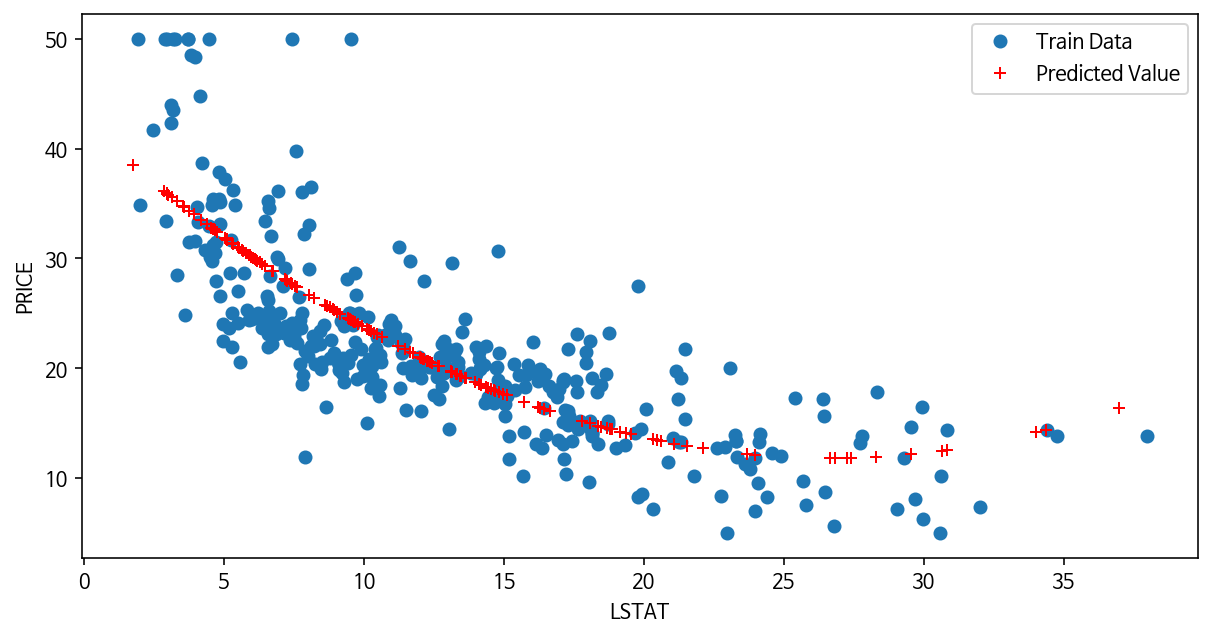

In [ ]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(X_train, y_train, 'o', label='Train Data')  # 데이터 분포
ax.plot(X_test, y_hat, 'r+', label='Predicted Value') # 모형이 학습한 회귀선
ax.legend(loc='best')
plt.xlabel('LSTAT')
plt.ylabel('PRICE')
plt.show()
plt.close()

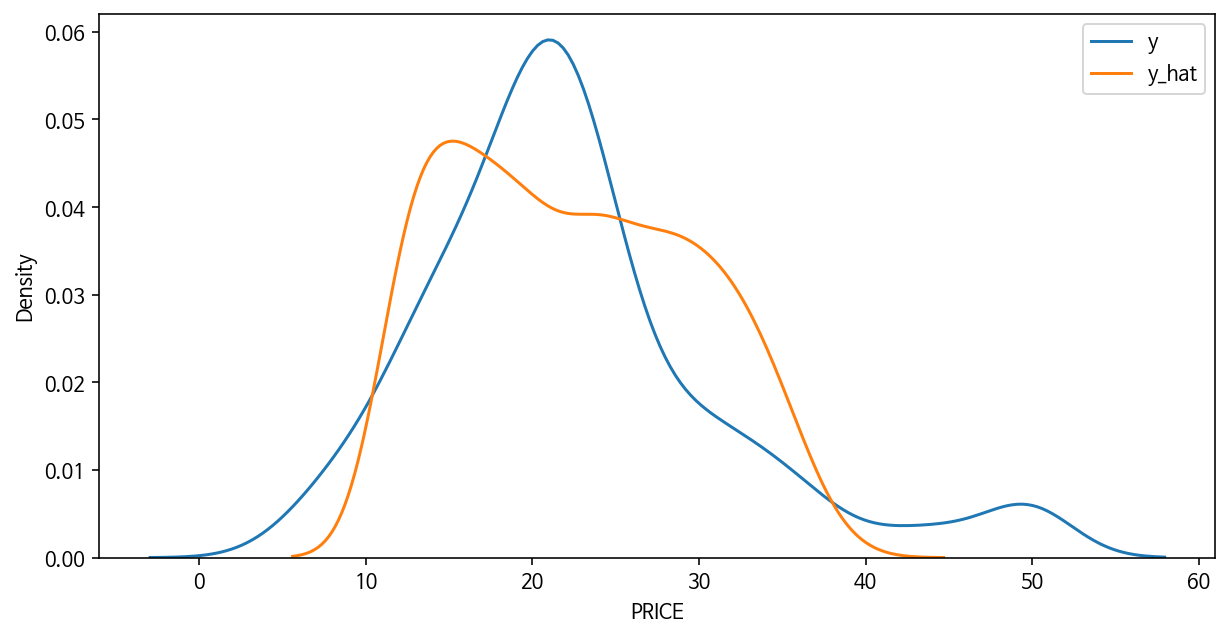

In [ ]:
# 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교 
X_ploy = poly.fit_transform(X)
y_hat = pr.predict(X_ploy)

plt.figure(figsize=(10, 5))
ax1 = sns.kdeplot(y, label="y")
ax2 = sns.kdeplot(y_hat, label="y_hat", ax=ax1)
plt.legend()
plt.show()

### 다중회귀 분석
[Step 4] 데이터셋 구분 - 훈련용(train data)/ 검증용(test data)

In [10]:
# 속성(변수) 선택
X = bostonDF[['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']]
y = bostonDF['PRICE']

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,               #독립 변수 
                                                    y,               #종속 변수
                                                    test_size=0.3,   #검증 30%
                                                    random_state=10) #랜덤 추출 값 

print('train data 개수: ', X_train.shape)
print('test data 개수: ', X_test.shape)

train data 개수:  (354, 8)
test data 개수:  (152, 8)


In [11]:
# sklearn 라이브러리에서 선형회귀분석 모듈 가져오기
from sklearn.linear_model import LinearRegression

# 단순회귀분석 모형 객체 생성
lr = LinearRegression()   

# train data를 가지고 모형 학습
lr.fit(X_train, y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
r_square = lr.score(X_test, y_test)
r_square

0.6778223637082486

In [12]:
# 회귀식의 기울기
print('X 변수의 계수 a: ', lr.coef_)

X 변수의 계수 a:  [ 3.74708508e+00  1.22482692e-02  5.69302013e-03 -8.44316428e+00
  4.34726288e-02 -9.25339365e-01 -6.38675520e-01  1.79604536e-02]


In [13]:
# 회귀식의 y절편
print('상수항 b', lr.intercept_)

상수항 b 25.315884414003314


In [14]:
# 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교 
y_hat = lr.predict(X_test)
y_hat

array([26.45989561, 30.96243828, 29.48879333, 27.71861917, 20.67557099,
       18.71631435, 37.71087915, 14.15248488, 20.66380364, 37.02649705,
       19.38770094, 27.92524911, 24.4830703 , 31.49397858, 29.97463912,
       39.85230801, 24.64064975, 20.7662888 , 23.9144469 , 22.0431542 ,
       34.12527806, 17.49917261, 24.81168894, 25.02067862, 34.42852972,
       20.14055361, 22.1883102 , 18.02148607, 37.02721757,  1.85504971,
       33.9926415 , 31.39046216, 27.8249849 , 23.86696394, 18.4086999 ,
       18.54749928,  5.24263503, 30.87378298, 25.24049147, 26.74703841,
       32.17412757, 28.57013902, 16.67910684, 31.03005509, 19.36772531,
       28.68504447, 18.97746696, 20.76716913, 37.84734573, 17.33761375,
       25.29859327, 17.1093184 , 23.06983708, 33.58121517, 26.33288719,
       32.60253093, 20.00776885, 19.00137717, 16.02942232, 24.56736509,
       20.74779154, 22.99529247, 40.15006759, 41.30349561, 28.32531857,
       16.14095796, 23.73539374,  2.01724898, 29.91289146, 33.48

In [15]:
df_y = pd.DataFrame({'y_hat':y_hat, 'y':y_test})
df_y

,y_hat,y
305,26.459896,28.4
193,30.962438,31.1
65,29.488793,23.5
349,27.718619,26.6
151,20.675571,19.6
...,...,...
56,28.711512,24.7
37,21.583340,21.0
66,24.624773,19.4
427,18.812364,10.9


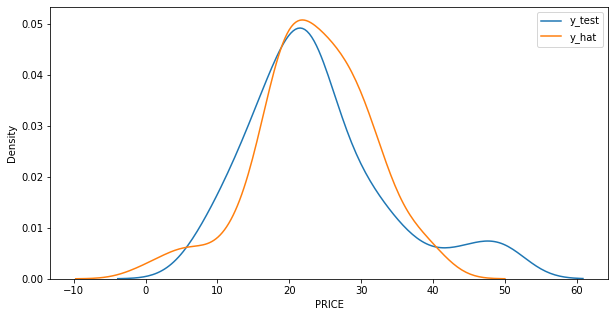

In [17]:
# train data의 산점도와 test data로 예측한 회귀선을 그래프로 출력 
y_hat = lr.predict(X_test)

plt.figure(figsize=(10, 5))
ax1 = sns.kdeplot(y_test, label="y_test")
ax2 = sns.kdeplot(y_hat, label="y_hat", ax=ax1)
plt.legend()
plt.show()